In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()


In [4]:
lr=LinearRegression(normalize=True)


In [5]:
x=diabetes.data
y=diabetes.target
lr_scores=cross_val_score(lr,x,y,cv=10)

In [6]:
print(lr_scores)

[0.55614411 0.23056092 0.35357777 0.62190498 0.26587602 0.61819338
 0.41815916 0.43515232 0.43436983 0.68568514]


In [7]:
print(lr_scores.mean())

0.4619623619583372


In [8]:
rg=Ridge(0.005,normalize=True)


In [9]:
rg_scores=cross_val_score(rg,x,y,cv=10)


In [10]:
rg_scores.mean()

0.462758069707298

In [11]:
from sklearn.linear_model import RidgeCV
rg=RidgeCV(alphas=(1.0,0.1,0.01,0.005,0.001,0.00025),normalize=True)

In [13]:
rg.fit(x,y)


RidgeCV(alphas=array([1.0e+00, 1.0e-01, 1.0e-02, 5.0e-03, 1.0e-03, 2.5e-04]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring=None, store_cv_values=False)

In [14]:
rg.alpha_


0.005

In [15]:
rg_cv_scores=cross_val_score(rg,x,y,cv=10)
print(rg_cv_scores)
rg_cv_scores.mean()


[0.52803256 0.23342917 0.3565488  0.607513   0.2695777  0.62172635
 0.42346862 0.43894932 0.43138195 0.6642474 ]


0.45748748734612066

In [16]:
from sklearn.linear_model import LassoCV
ls_cv=LassoCV(alphas=(1.0,0.1,0.01,0.005,0.001,0.00025),normalize=True)

In [17]:
ls_cv.fit(x,y)
ls_cv.alpha_



C:\Users\Pratik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.01

In [21]:
ls_cv_scores=cross_val_score(ls_cv,x,y,cv=10)
print(ls_cv_scores)
ls_cv_scores.mean()


C:\Users\Pratik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Pratik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Pratik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Pratik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the defau

[0.54453667 0.23107868 0.35415718 0.59752149 0.27121898 0.62428503
 0.41851368 0.44491889 0.42562829 0.68561464]


C:\Users\Pratik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Pratik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Pratik\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.4597473543289192

In [22]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
en=ElasticNet(alpha=0.001,l1_ratio=0.8,normalize=True)

In [23]:
en_scores=cross_val_score(en,x,y,cv=10)
print(en_scores)
en_scores.mean()


[0.53103739 0.24682675 0.38160097 0.60832995 0.2830996  0.62083992
 0.43113636 0.43484866 0.43055758 0.6676087 ]


0.46358858847836454

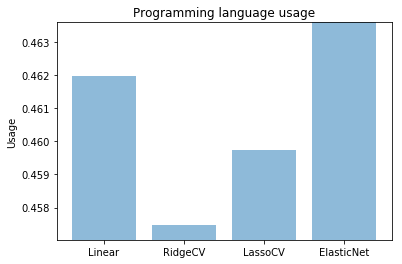

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math 
objects = ('Linear','RidgeCV','LassoCV','ElasticNet')
y_pos = np.arange(len(objects))
per = [lr_scores.mean(),rg_cv_scores.mean(),ls_cv_scores.mean(),en_scores.mean()]
low = min(per)
high = max(per)
plt.ylim(low-low/1000,high)
plt.bar(y_pos, per, align='center', alpha=0.5)
plt.ylabel('Usage')
plt.xticks(y_pos, objects)
plt.title('Programming language usage')
plt.show()